In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold_data = pd.read_csv('gld_price_data.csv')

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
gold_data.shape

(2290, 6)

In [11]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


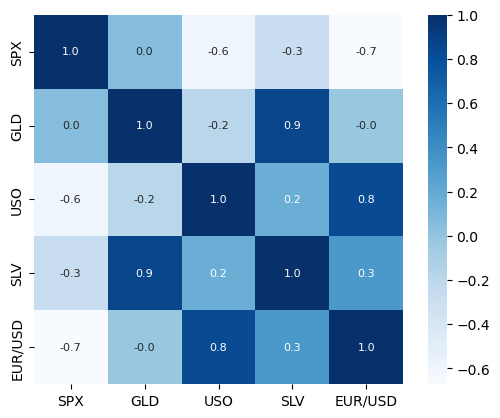

<Figure size 1000x1000 with 0 Axes>

In [29]:
# gold_data['Date'] = pd.to_datetime(gold_data['Date'], errors='coerce')

# Exclude non-numeric columns before calculating correlation
numeric_data = gold_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation = numeric_data.corr()
sns.heatmap(correlation,cbar=True,square=True,fmt='0.1f',annot=True,annot_kws={'size':8},cmap='Blues')
plt.figure(figsize=(10,10))
plt.show()

In [31]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\kabir\AppData\Local\Temp\ipykernel_25188\234377077.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

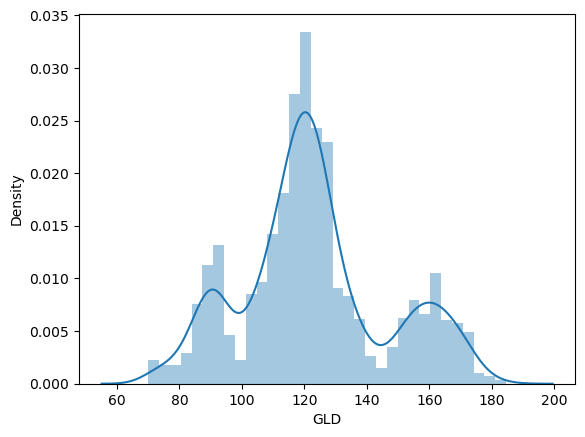

In [33]:
sns.distplot(gold_data['GLD'])

In [35]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [37]:
X,Y

(              SPX        USO      SLV   EUR/USD
 0     1447.160034  78.470001  15.1800  1.471692
 1     1447.160034  78.370003  15.2850  1.474491
 2     1411.630005  77.309998  15.1670  1.475492
 3     1416.180054  75.500000  15.0530  1.468299
 4     1390.189941  76.059998  15.5900  1.557099
 ...           ...        ...      ...       ...
 2285  2671.919922  14.060000  15.5100  1.186789
 2286  2697.790039  14.370000  15.5300  1.184722
 2287  2723.070068  14.410000  15.7400  1.191753
 2288  2730.129883  14.380000  15.5600  1.193118
 2289  2725.780029  14.405800  15.4542  1.182033
 
 [2290 rows x 4 columns],
 0        84.860001
 1        85.570000
 2        85.129997
 3        84.769997
 4        86.779999
            ...    
 2285    124.589996
 2286    124.330002
 2287    125.180000
 2288    124.489998
 2289    122.543800
 Name: GLD, Length: 2290, dtype: float64)

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.2,random_state=2)

In [41]:
X_train

,SPX,USO,SLV,EUR/USD
1474,2011.359985,34.619999,17.770000,1.292006
1122,1517.930054,34.700001,30.430000,1.338939
793,1193.890015,34.009998,39.330002,1.442918
35,1353.109985,78.599998,17.916000,1.482602
25,1336.910034,69.800003,16.670000,1.447890
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [43]:
X_test

,SPX,USO,SLV,EUR/USD
903,1351.949951,38.330002,32.900002,1.324854
129,1271.510010,93.900002,13.450000,1.472581
1787,1880.050049,8.910000,14.340000,1.119996
1913,2181.300049,10.960000,18.620001,1.127142
2048,2352.949951,10.680000,17.320000,1.067247
...,...,...,...,...
1838,2091.699951,10.810000,16.290001,1.129905
53,1298.420044,82.290001,18.250999,1.563893
706,1273.719971,40.689999,33.509998,1.388484
136,1224.510010,82.349998,11.180000,1.398406


In [53]:
reg = RandomForestRegressor(n_estimators=100)

In [55]:
reg.fit(X_train,Y_train)

RandomForestRegressor()

In [57]:
Y_predict = reg.predict(X_test)

In [73]:
print("First 10 predicted value of Y")
print(Y_predict[:10])
print("First 10 test values of Y ")
print(np.array(Y_test[:10]))
print("The Accuracy of the RandomForestRegressor is ")
print(reg.score(X_test,Y_test))

First 10 predicted value of Y
[168.45299999  86.31139926 114.455199   127.67160047 119.91090178
 154.2220959  149.91080039 125.09469957 117.80029919 126.64369878]
First 10 test values of Y 
[168.020004  81.230003 112.32     127.589996 119.620003 154.210007
 148.910004 126.190002 117.470001 125.739998]
The Accuracy of the RandomForestRegressor is 
0.9747500396473615


In [78]:
Y_test = list(Y_test)

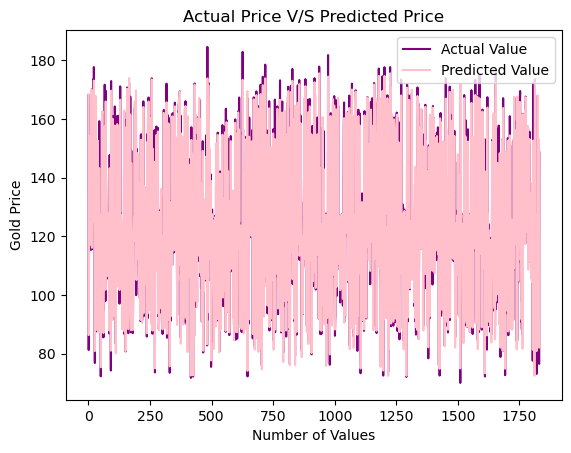

In [82]:
plt.plot(Y_test,color='purple',label='Actual Value')
plt.plot(Y_predict,color='pink',label='Predicted Value')
plt.title("Actual Price V/S Predicted Price")
plt.xlabel("Number of Values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

In [183]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [187]:
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [189]:
Y_predict1 = xgb.predict(X_test)

In [191]:
xgb.score(X_test,Y_test)

0.9662528273097729

In [200]:
input_data = (5344.16,76.22,27.44,1.092)
# SPX        USO      SLV   EUR/USD

In [202]:
input_data = np.array(input_data)
input_data = input_data.reshape(1, -1)

In [208]:
Y_predict = reg.predict(input_data)
Y_predict = Y_predict*10
# Y_predict = Y_predict/28.349523125

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [210]:
print('The price of gold is $',Y_predict,'per gram in US')

The price of gold is $ [1509.0989993] per gram in US
